In [1]:
%matplotlib inline

# Planet Positions in the Solar System

I wanted to make some jewelry that had a representation of the solar system on specific dates. (I've written more about this project at https://www.feelslikeburning.com/blog/2020/03/08/milling-planetary-position-jewelry/)

Let's get some planet positions, as looking down onto the ecliptic.  (Imagine scaling the solar system down so it fits into a pizza box.  This is analogous to opening the pizza box and looking down onto the pizza.)

First, let's install sunpy.

In [2]:
!pip install sunpy

Alright.  Slick.  Next, let's get polar coordinates for each planet position at a specific time and date.

In [3]:
from sunpy.coordinates import get_body_heliographic_stonyhurst
from astropy.time import Time
import matplotlib.pyplot as plt
import numpy as np
import math

obstime = Time('2016-11-19T00:00:00.000')

planets = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune']

def getPlanetPositions(t, planets):
    planet_locations = {}
    for planet in planets:
        planet_locations[planet] = get_body_heliographic_stonyhurst(planet, time=t)
    return planet_locations
planet_locations = getPlanetPositions(obstime, planets)

Now, we have a dictionary of the planets, with SkyCoords representing their locations at that time.  The SkyCoords have their radii in AU, and "the angle".  Let's make a plot!

Planet: mercury ; Angle: -138.71659367265096 deg; Distance 0.4591364306880638 AU
Planet: venus ; Angle: -75.8665408553141 deg; Distance 0.7275635089618558 AU
Planet: earth ; Angle: 1.0468520638021209e-14 deg; Distance 0.988243846284641 AU
Planet: mars ; Angle: -67.8215510630202 deg; Distance 1.3842544990077617 AU
Planet: jupiter ; Angle: 130.55847061228263 deg; Distance 5.45445950842508 AU
Planet: saturn ; Angle: -159.20559304717574 deg; Distance 10.044940604242097 AU
Planet: uranus ; Angle: -34.173907270634004 deg; Distance 19.942403420444883 AU
Planet: neptune ; Angle: -76.16720035685847 deg; Distance 29.953125915995496 AU


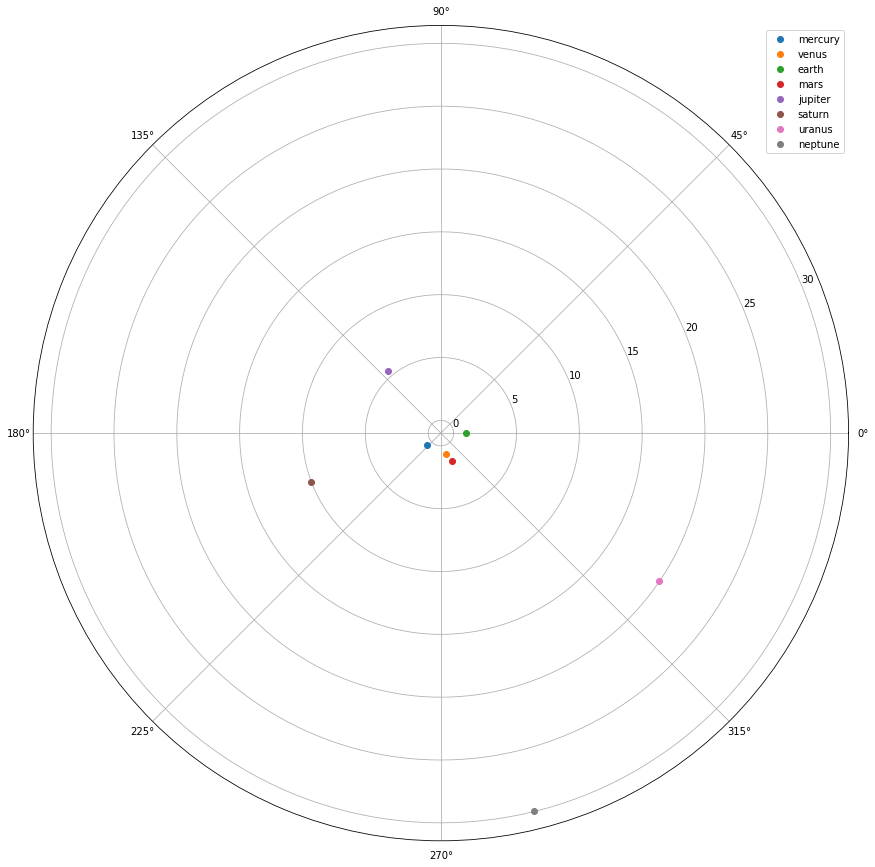

In [4]:
plt.rcParams['figure.figsize'] = [15, 15]

fig = plt.figure()
ax1 = plt.subplot(1, 1, 1, projection='polar')
for planet, coord in planet_locations.items():
    print("Planet: {} ; Angle: {}; Distance {}".format(planet, coord.lon, coord.radius))
    plt.polar(np.deg2rad(coord.lon), coord.radius, 'o', label=planet)
plt.legend()
plt.show()

(Note that the concentric circles are not orbits, they are part of the polar graph "grid".)


Wow! Neptune is like 30 AU out!

After checking this with some online tools, to try to verify that I didn't just generate nonsense, I thought about what I wanted my art to look like.

I want to make some rays from the sun, pointing at each planet, rather than a set of concent orbits.

Let's get them on the unit circle.

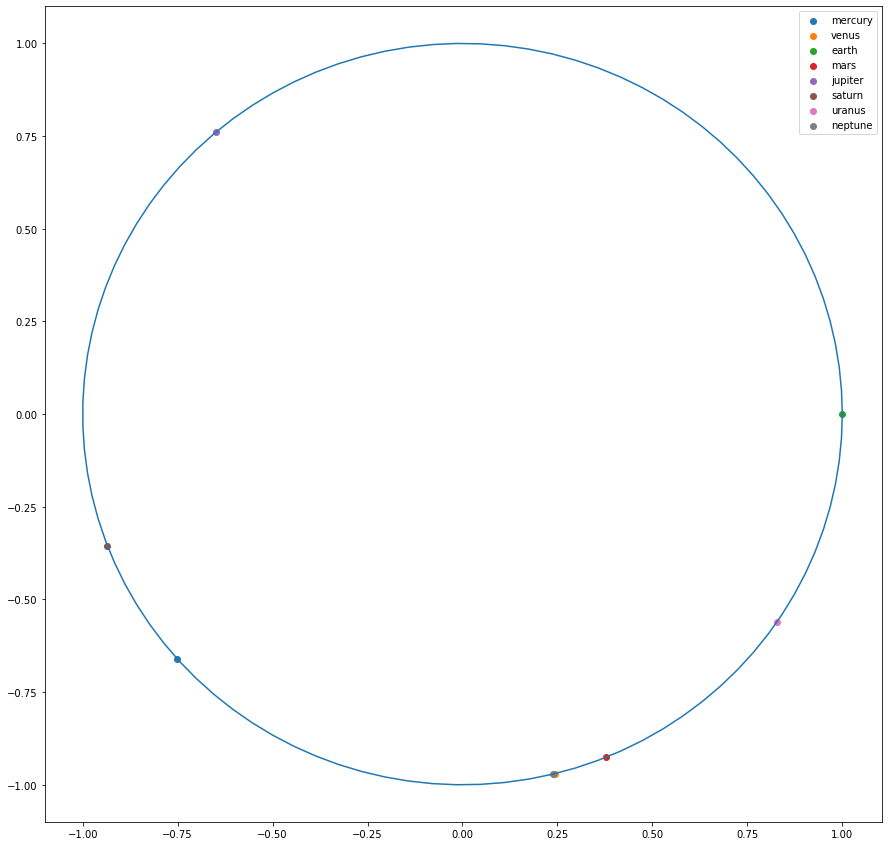

In [5]:
fig, ax = plt.subplots(1)
for planet, coord in planet_locations.items():
    x = np.cos(np.degrees(coord.lon))
    y = np.sin(np.degrees(coord.lon))
    plt.scatter(x, y, label=planet)

#now let's do a circle
theta = np.linspace(0, 2*np.pi, 100)
r = np.sqrt(1.0)
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
ax.plot(x1, x2)

plt.legend()
plt.show()

That's pretty slick.  Now let's make rays that point at those places.

Instead of scaling the lengths directly, let's just make Neptune the longest and Mercury the shortest, and split the rest evenly.

Let's try a quiver plot.

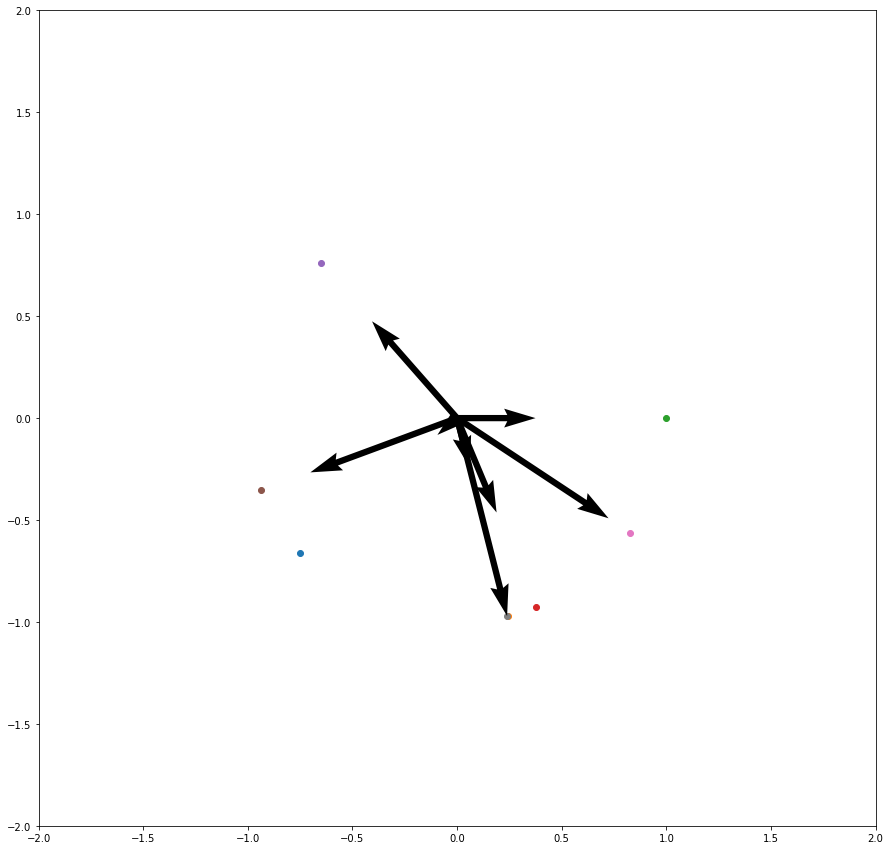

In [6]:
fig, ax = plt.subplots(1)
vectors = []

for planet, coord in planet_locations.items():
    x = np.cos(coord.lon)
    y = np.sin(coord.lon)
    length = math.sqrt(x**2 + y**2) 
    index = planets.index(planet)
    rank = (1+index)/len(planet_locations)
    vectors.append((0, 0,  rank*x/length, rank*y/length))
    plt.scatter(x, y, label=planet)

a = np.array(vectors)
x, y, u, v = zip(*a)
plt.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=1)
plt.draw()
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.show()

That looks a little more Chaos Magicky than I'm going for with this project, so let's try just lines.


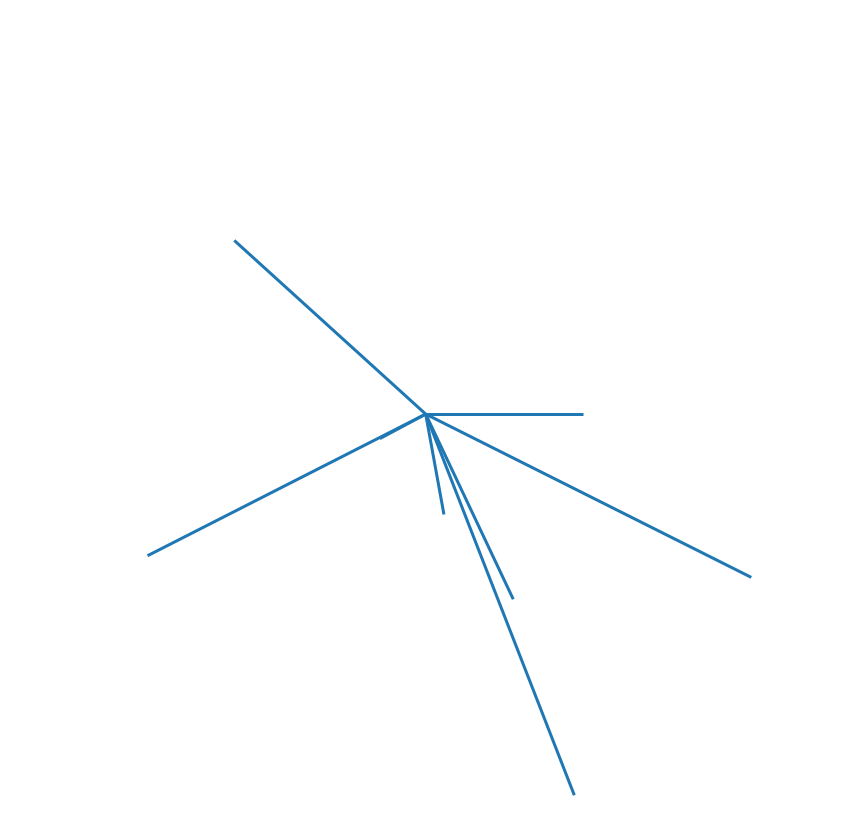

In [7]:
from matplotlib.collections import LineCollection


def generatePlanetPositionsPlot(t, planets=None):
    fig, ax = plt.subplots(1)

    if planets is None:
        planets = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune']
    planet_locations = getPlanetPositions(t, planets)
    
    lines = []
    for planet, coord in planet_locations.items():
        x = np.cos(coord.lon)
        y = np.sin(coord.lon)
        length = math.sqrt(x**2 + y**2)  #I'm certain there is a better way 
        rank = (1+planets.index(planet))/len(planets)
        lines.append(([0, 0], [rank*x/length, rank*y/length]))
        
    lc = LineCollection(lines, lw=3)
    
    plt.gca().add_collection(lc)
    plt.ylim(-1,1)
    plt.xlim(-1,1)
    #hide the axis for saving
    plt.axis('off')
    
    #plt.savefig("{}.svg".format(t)) #uncomment to save to svg
    #plt.savefig("{}.png".format(t)) #uncomment to save to png

    plt.show()

generatePlanetPositionsPlot(Time('2016-11-12T00:00:00.000'))

Wonderful!  This is exactly what I want.

If you run this with different dates, you'll notice that Earth is always at 0 degrees.  This is actually an innate part of the coordinate system used (Stonyhurst coordinates).

I want to switch that up, so I can make animations, but this worked well enough and I ran into a deadline.  If any of you space folks have any tips on a different coordinate system that will be closer to what I want, let me know!